In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Task 1: Data Preparation
# (a) Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
# (b) Flatten the images
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255



In [ ]:
# (c) Normalize pixel values
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)



In [ ]:
# Task 2: Model Design
# (d) Design the neural network
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))



In [ ]:
# Task 3: Model Training
# (e) Configure the model for training
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)



Epoch 1/10
375/375 [==============================] - 4s 9ms/step - loss: 0.3958 - accuracy: 0.8923 - val_loss: 0.2155 - val_accuracy: 0.9399
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1873 - accuracy: 0.9464 - val_loss: 0.1598 - val_accuracy: 0.9548
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1377 - accuracy: 0.9608 - val_loss: 0.1311 - val_accuracy: 0.9621
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1077 - accuracy: 0.9697 - val_loss: 0.1158 - val_accuracy: 0.9672
Epoch 5/10
375/375 [==============================] - 2s 7ms/step - loss: 0.0874 - accuracy: 0.9755 - val_loss: 0.1090 - val_accuracy: 0.9686
Epoch 6/10
375/375 [==============================] - 4s 9ms/step - loss: 0.0735 - accuracy: 0.9789 - val_loss: 0.1018 - val_accuracy: 0.9695
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0614 - accuracy: 0.9824 - val_loss: 0.0976 - val_accuracy: 0.9721
Epoch 

In [ ]:
# Task 4: Model Evaluation
# (f) Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_accuracy}')



313/313 [==============================] - 1s 2ms/step - loss: 0.0858 - accuracy: 0.9738
Test Accuracy: 0.973800003528595


In [ ]:
# (g) Confusion matrix
predictions = model.predict(test_images)
conf_matrix = confusion_matrix(np.argmax(test_labels, axis=1), np.argmax(predictions, axis=1))
print('Confusion Matrix:')
print(conf_matrix)



313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
[[ 969    0    1    2    2    0    1    3    1    1]
 [   0 1129    2    0    0    1    2    1    0    0]
 [   3    5 1006    1    1    0    1    9    6    0]
 [   0    0    6  988    0    2    0    7    1    6]
 [   3    0    6    0  949    0    5    4    1   14]
 [   3    0    0   12    1  859    8    2    4    3]
 [  11    3    1    1    4    3  934    0    1    0]
 [   0    7    6    1    1    0    0 1008    1    4]
 [   7    1    7   12    5    5    4    8  921    4]
 [   4    5    1    9    6    3    0    5    1  975]]


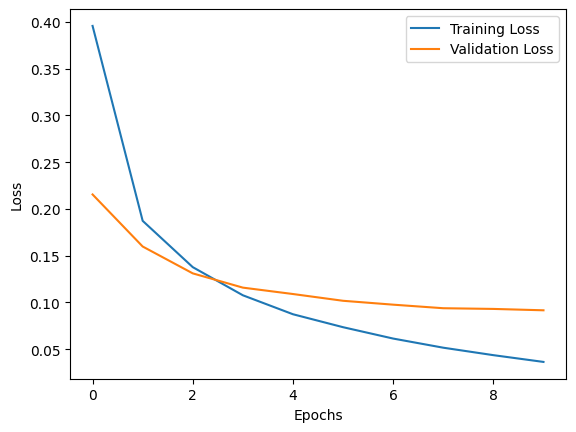

In [ ]:
# (h) Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [ ]:
# (i) Display 5 correctly and 5 incorrectly classified images
predicted_labels = np.argmax(predictions, axis=1)
correctly_classified = np.where(predicted_labels == np.argmax(test_labels, axis=1))[0]
incorrectly_classified = np.where(predicted_labels != np.argmax(test_labels, axis=1))[0]



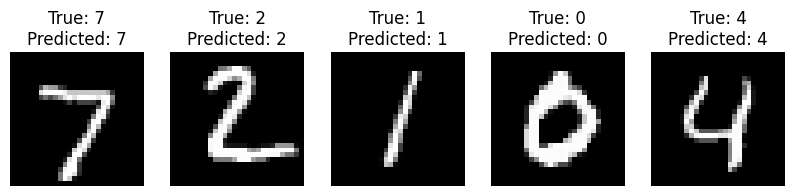

In [ ]:
# Display 5 correctly classified images
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[correctly_classified[i]].reshape(28, 28), cmap='gray')
    plt.title(f'True: {np.argmax(test_labels[correctly_classified[i]])}\nPredicted: {predicted_labels[correctly_classified[i]]}')
    plt.axis('off')

plt.show()



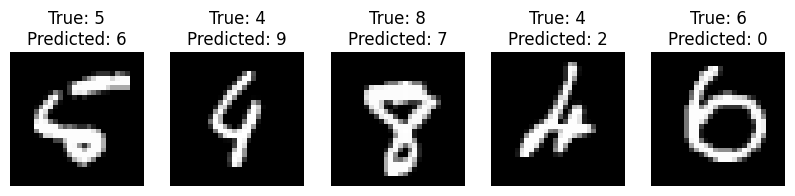

In [ ]:
# Display 5 incorrectly classified images
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[incorrectly_classified[i]].reshape(28, 28), cmap='gray')
    plt.title(f'True: {np.argmax(test_labels[incorrectly_classified[i]])}\nPredicted: {predicted_labels[incorrectly_classified[i]]}')
    plt.axis('off')

plt.show()

In [ ]:

# Task 6: Analysis
# (j) Analyze the loss curves and suggest improvements
"""
Here the model is getting overfit.
One thing that can be done to improve this is to get
"""